# Gaia DR3 Local H-R Diagrams

Hertzsprung-Russell diagrams for local stars from Gaia DR3. We use a pre-executed target query from the
Gaia EDR3 database with the following selection:
 * parallax > 10mas
 * parallax error 1% ($\sigma_\varpi/\varpi$<0.01)
 * M$_G$<18

A second offline calculation used the PARSEC model database to make an approximate conversion of Gaia
absolute M$_G$ magnitude and BP-RP color to luminosity and effective temperature. The calculation finessed
the bolometric corrections so this is OK for teaching/demo purposes but not something you should ever use
for research.

The data file has colors, magnitudes, L/Lsun, Teff, and parallax for 226,635 stars

Based on Fig1.10 from Pinsonnealt & Ryden *Stellar Structure and Evolution*

In [25]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter, FixedLocator

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

#### Figure Filename

`figName` sets the figure filename of the form `Fig<chapterNum>_<figNum>`, the figure number may also 
include a lowercase  letter for a subfigure (e.g., Fig1_2a).  

#### Aspect Ratio

`aspect` sets the aspect ratio, width/height.  The default aspect ratio is 4:3, 1:1 for square plots, 
and 5:2 (2.5:1) for spectra, and equal aspect ratio for images and plots of Cartesian coordinates.
Use a formula instead of decimal when the result is a fraction (example: `aspect = 4.0/3.0` instead of
`aspect=1.33`).

In [10]:
figName = 'HR_GaiaEDR3_2panel' 

aspect = 1.8

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 8
labelFontSize = 6
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# Plot filename

plotFile = f'{figName}.{figFmt}'

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'12'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Gaia EDR3 Data

The EDR3 search was...
<pre>
SELECT phot_bp_mean_mag-phot_rp_mean_mag AS color, phot_g_mean_mag+5*log10(parallax)-10 AS mg, parallax FROM gaiaedr3.gaia_source
WHERE parallax_over_error > 100
AND parallax > 10
AND phot_g_mean_mag < 18
</pre>

Data columns are
 * BP-RP = observed BP-RP color
 * MB = absolute magnitude in the Gaia G band derived from apparent G and parallax
 * logT = log10 of effective temperature in K
 * logL = log10 of luminosity in L$_{sun}$ using the bolometric corrections of xxx
 * Gaia parallax in mas


In [11]:
dataFile = 'Gaia_EDR3_HR.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

MG = np.array(data['MG'])
BP_RP = np.array(data['BP-RP'])
logTeff = np.array(data['logT'])
logL = np.array(data['logL'])

## Gaia EDR3 H-R diagrams

2-panel side-by-side plot
 * left: observed color magnitude diagram (M$_G$ vs $B-V$)
 * right: physical H-R diagram (L vs T$_{eff}$)

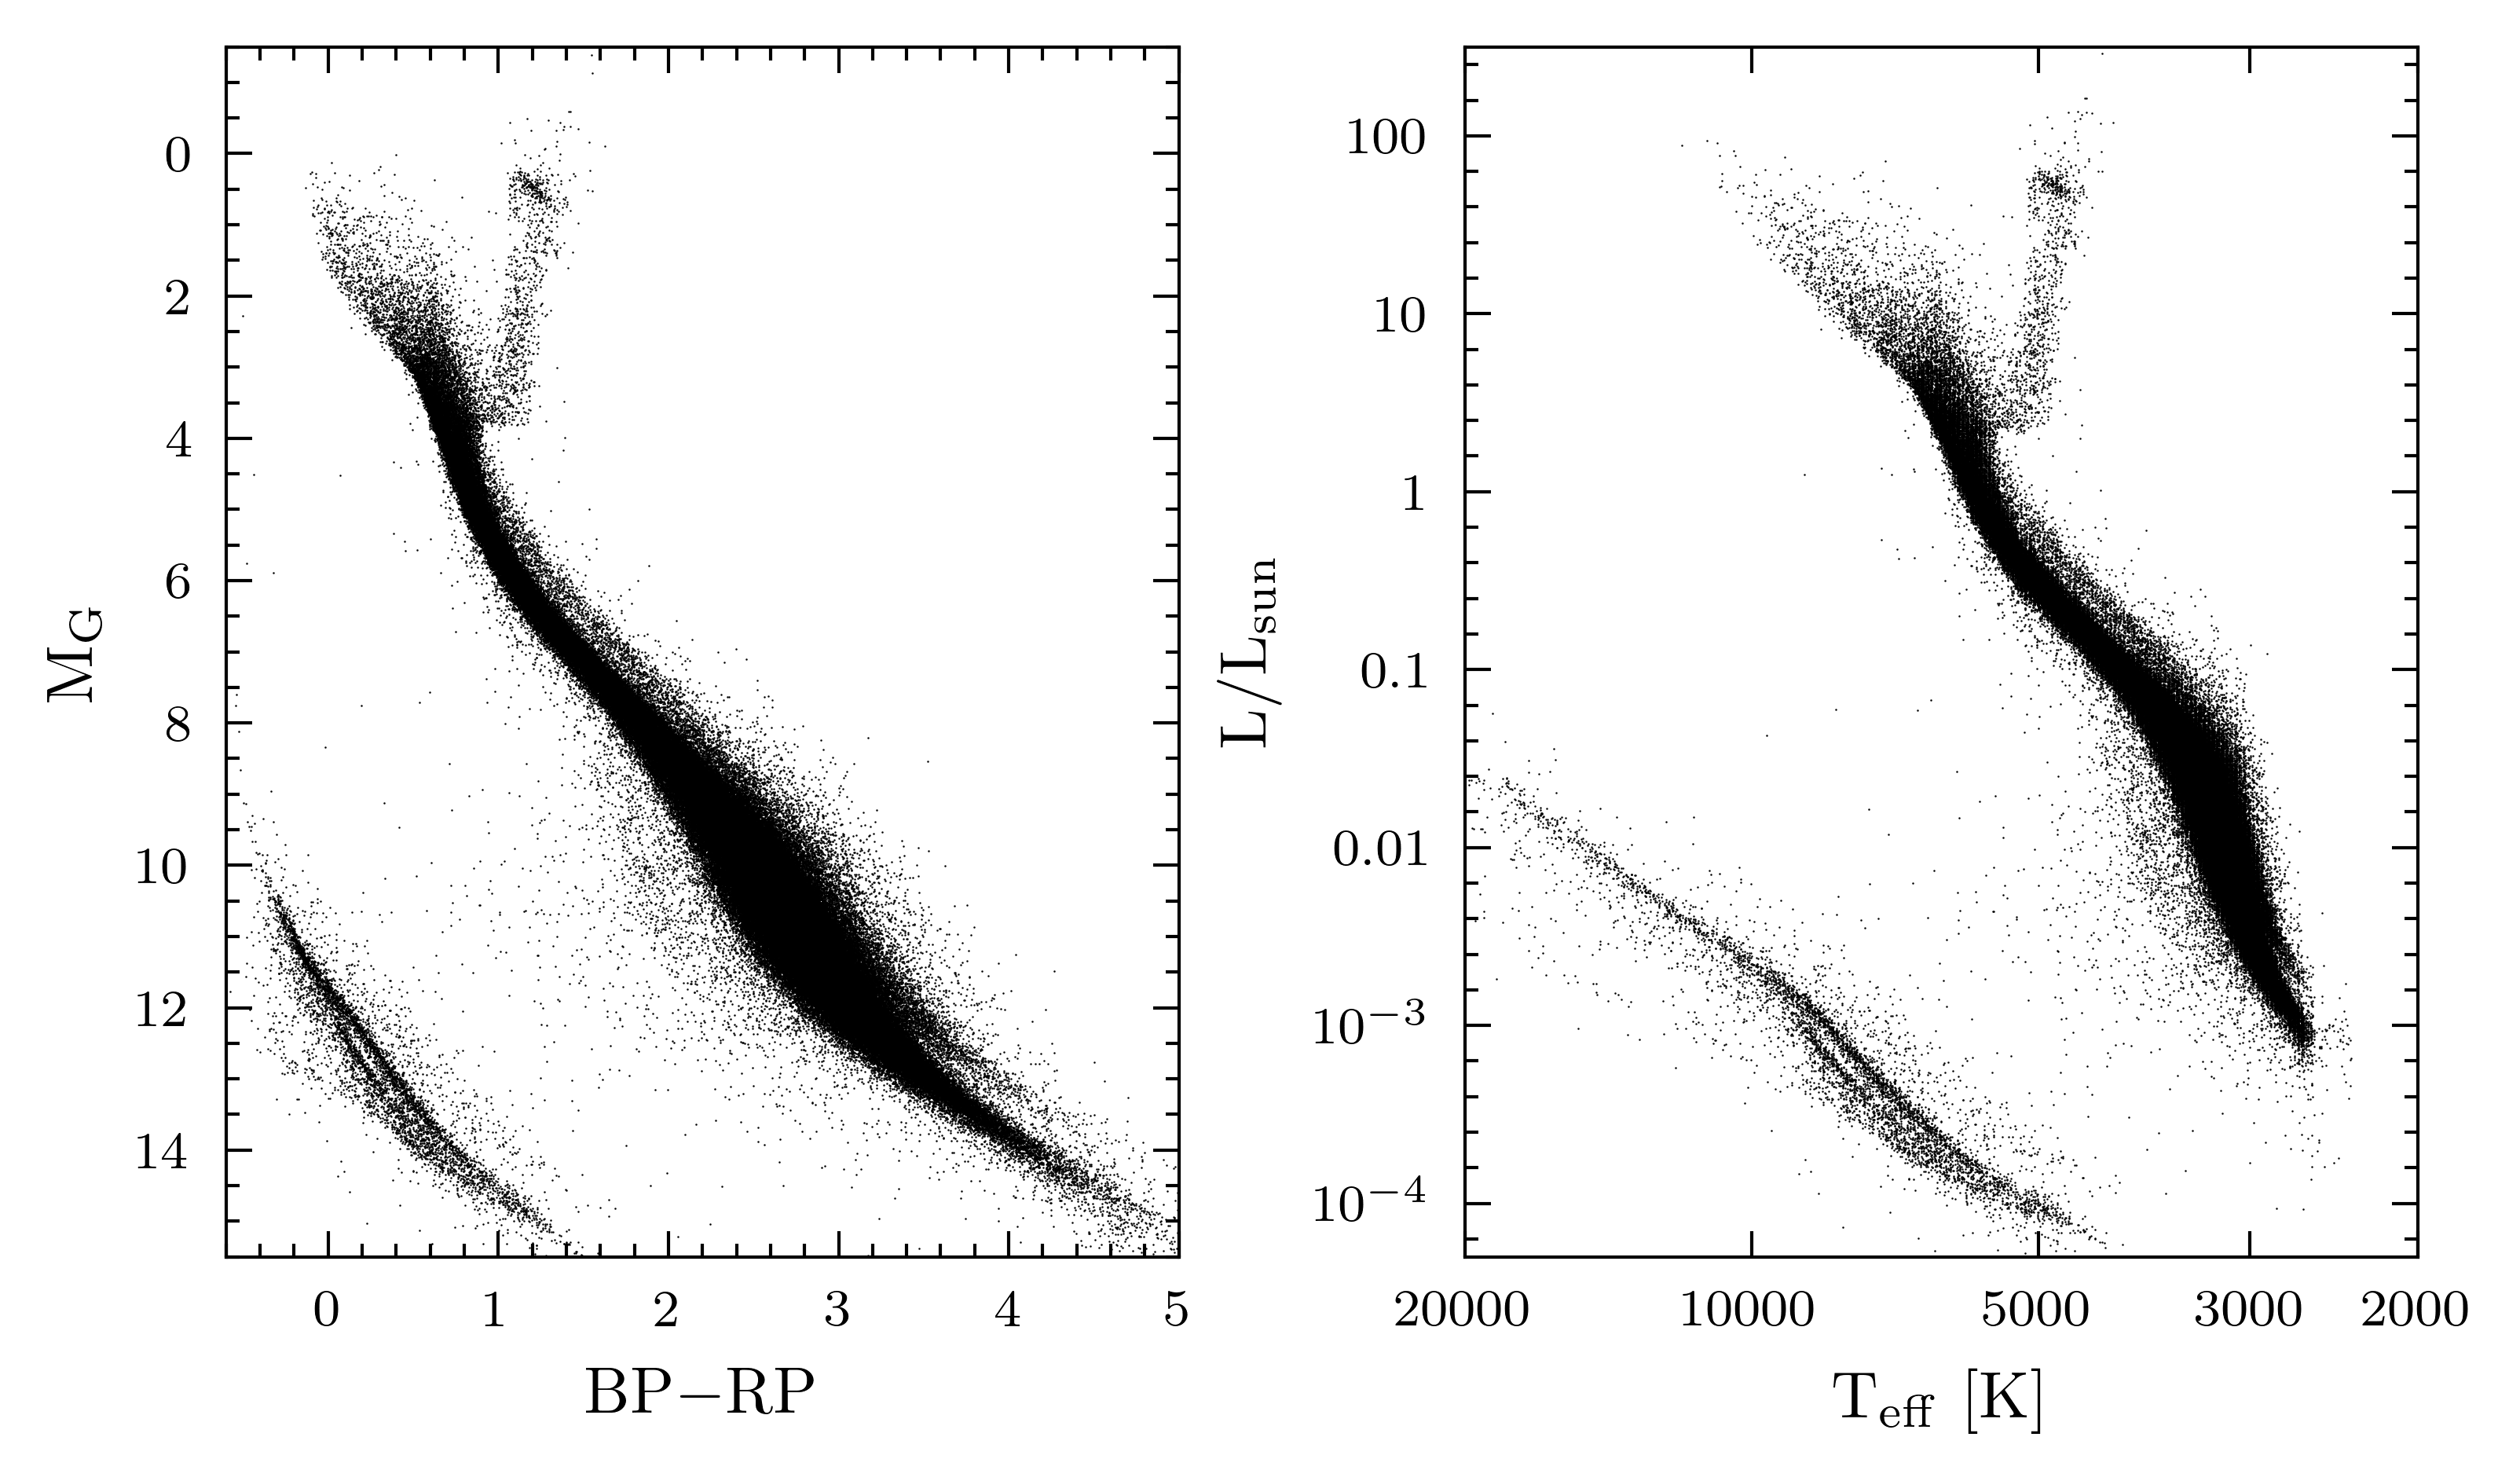

In [37]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
    
fig.subplots_adjust(wspace=0.3, hspace=0)

# Left panel

ax1.set_xlim(-0.6,5)
ax1.set_ylim(15.5,-1.5)
ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.xaxis.set_major_locator(MultipleLocator(1.0))
ax1.xaxis.set_minor_locator(MultipleLocator(0.2))
ax1.set_xlabel(r'BP$-$RP', fontsize=10)
ax1.yaxis.set_major_locator(MultipleLocator(2.0))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_ylabel(r'M$_{\rm G}$',fontsize=10)

ax1.plot(BP_RP,MG,'o',color='black',ms=0.3,mew=0,alpha=1,zorder=10)

# Right Panel

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(np.log10(20000),np.log10(2000))
ax2.xaxis.set_ticks(np.log10([20000,10000,5000,3000,2000]))
ax2.xaxis.set_ticklabels(['20000','10000','5000','3000','2000'])
ax2.xaxis.set_minor_locator(FixedLocator([15000,9000,8000,7000,6000,4000]))
#ax2.xaxis.set_major_locator(MultipleLocator(0.1))
#ax2.xaxis.set_minor_locator(MultipleLocator(0.02))
ax2.set_xlabel(r'T$_{\rm eff}$ [K]',fontsize=10)

ax2.set_ylim(-4.3,2.5)
ax2.yaxis.set_major_locator(MultipleLocator(1.0))
ax2.yaxis.set_minor_locator(MultipleLocator(0.2))
ax2.yaxis.set_ticks([-4,-3,-2,-1,0,1,2])
ax2.yaxis.set_ticklabels([r'10$^{-4}$',r'10$^{-3}$','0.01','0.1','1','10','100'])
ax2.set_ylabel(r'L/L$_{\rm sun}$',fontsize=10)

ax2.plot(logTeff,logL,'o',color='black',ms=0.3,mew=0,alpha=1,zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')